In [1]:
import sys, os
import numpy as np
import time, h5py

from utils import default_paths, nsd_utils, texture_utils, prf_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [25]:
for subject in [1,2,3,4,5,6,7,8,999,998]:
    fn2load = os.path.join(default_paths.stim_labels_root,'S%d_face.npy'%subject)
    d = np.load(fn2load, allow_pickle=True).item()
    has_face = d['has_face']
    has_face_wholeimage = d['has_face_wholeimage']

    
    fn2load = os.path.join(default_paths.stim_labels_root,'S%d_building.npy'%subject)
    d = np.load(fn2load, allow_pickle=True).item()
    has_building = d['has_building']
    has_building_wholeimage = d['has_building_wholeimage']
    
    prf_ind=600;
    print(np.mean(has_face[:,prf_ind]), np.mean(has_building[:,prf_ind]))
    un, counts = np.unique(np.array([has_face[:,prf_ind], has_building[:,prf_ind]]).T,axis=0, return_counts=True)
    print(un, counts)
    
    un, counts = np.unique(np.array([has_face_wholeimage, has_building_wholeimage]).T,axis=0, return_counts=True)
    print(un, counts)

0.1819 0.1509
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6909 1272 1582  237]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5184 1710 2361  745]
0.176 0.1499
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6962 1278 1539  221]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5215 1702 2343  740]
0.1752 0.1558
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6921 1327 1521  231]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5230 1778 2261  731]
0.1747 0.1579
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6891 1362 1530  217]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5160 1750 2322  768]
0.1763 0.152
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6950 1287 1530  233]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5262 1740 2275  723]
0.1692 0.1509
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [7019 1289 1472  220]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5246 1763 2250  741]
0.1754 0.1494
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6984 1262 1522  232]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [5261 1731 2251  757]
0.1727 0.1552
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [6939 1334 1509  218]
[[0. 

In [2]:
ims2load = np.arange(0,10000)
subject=999
if subject<9:
    image_data = nsd_utils.get_image_data(subject)
elif subject==999:
    from utils import coco_utils
    image_data = coco_utils.load_indep_coco_images(n_pix=240)
image_data = nsd_utils.image_uncolorize_fn(image_data[ims2load,:,:,:])
# image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]

Initializing coco api...
loading annotations into memory...
Done (t=0.99s)
creating index...
index created!
loading annotations into memory...
Done (t=21.43s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.60s)
creating index...
index created!
loading annotations into memory...
Done (t=16.32s)
creating index...
index created!

loading images from /user_data/mmhender/nsd/stimuli/Indep_set_stimuli_240.h5py



In [3]:
subject

999

In [4]:
fn2load = os.path.join(default_paths.stim_labels_root,'S%d_face.npy'%subject)
d = np.load(fn2load, allow_pickle=True).item()
has_face = d['has_face']
has_face_wholeimage = d['has_face_wholeimage']

In [5]:
fn2load = os.path.join(default_paths.stim_labels_root,'S%d_building.npy'%subject)
d = np.load(fn2load, allow_pickle=True).item()
has_building = d['has_building']
has_building_wholeimage = d['has_building_wholeimage']

In [8]:
prf_ind = 100
np.mean(has_face[:,prf_ind]), np.mean(has_building[:,prf_ind])

(0.3668, 0.2316)

In [10]:
has_face_wholeimage, has_building_wholeimage

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [11]:
np.unique(has_face_wholeimage, return_counts=True)

(array([0., 1.]), array([6332, 3668]))

In [12]:
np.unique(has_building_wholeimage, return_counts=True)

(array([0., 1.]), array([7527, 2473]))

In [13]:
prf_ind = 100;
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    

prf_params = models[prf_ind,:]    
x,y,sigma = prf_params
n_pix = 240
aperture=1.0
prf = prf_utils.gauss_2d(center=[x, y], sd=sigma, patch_size=n_pix, aperture=1.0, \
                                      dtype=np.float32)
prf_mask = prf_utils.get_prf_mask(center=[x, y], sd=sigma, patch_size=n_pix)
mask_sum = np.sum(prf_mask)
min_pix_req = np.ceil(mask_sum*0.10)

n_prf_sd_out = 2
prf_bbox = texture_utils.get_bbox_from_prf(prf_params, (n_pix, n_pix), n_prf_sd_out, \
                                                   min_pix=None, verbose=False, force_square=False)

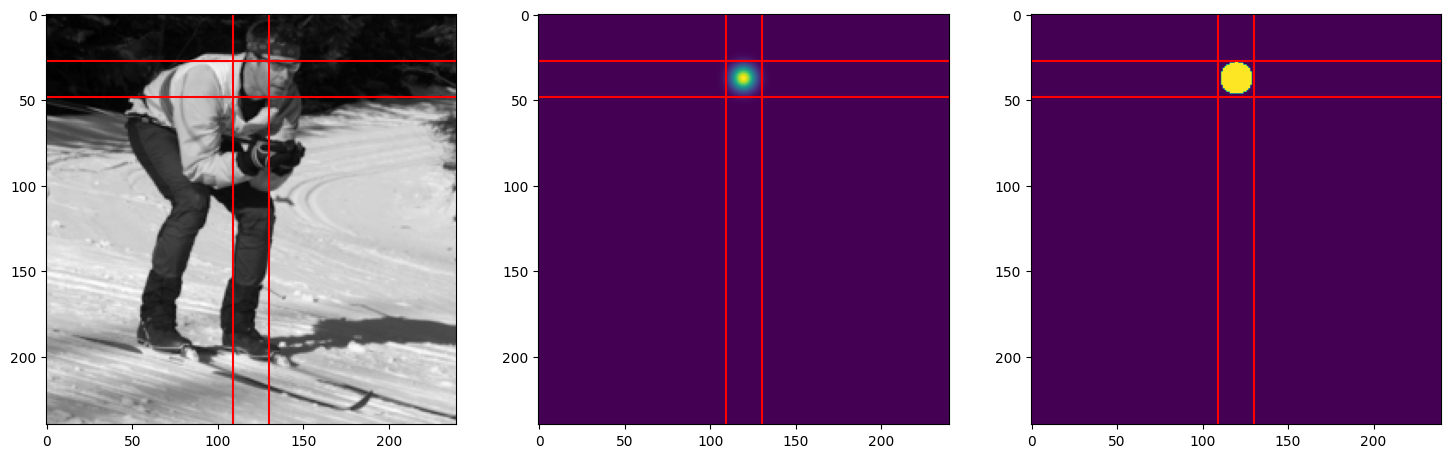

In [14]:
# Plot pRF bounding boxes

ii = np.where(has_face[:,prf_ind])[0][0]
nsd_image = np.moveaxis(image_data[ii,:,:,:], [0],[2])

plt.figure(figsize=(18,6));
plt.subplot(1,3,1)
plt.imshow(nsd_image, cmap='gray')
# show the prf on top to make sure it is where it should be
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,2)
plt.imshow(prf)
# plt.colorbar()
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,3)
plt.imshow(prf_mask)
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

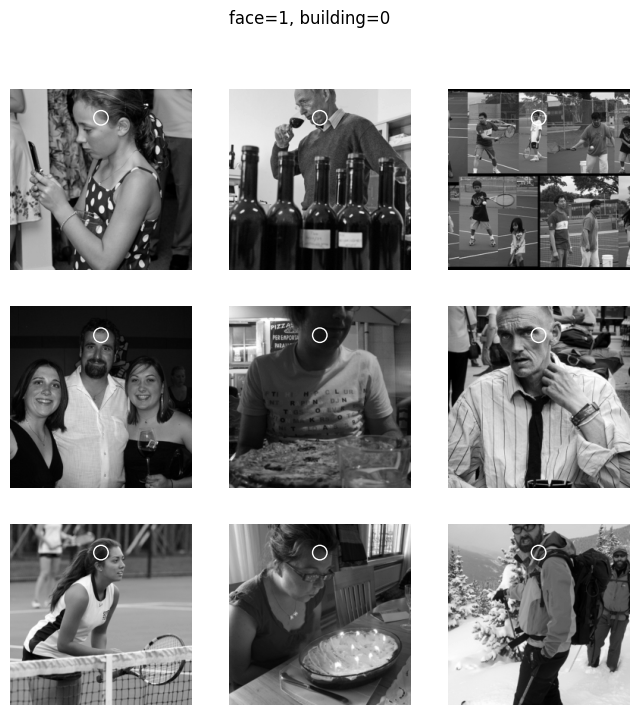

In [15]:
# plot examples - "has face" patches

ims2use = np.where((has_face[:,prf_ind]==1) & (has_building[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.suptitle('face=%d, building=%d'%(has_face[im, prf_ind], has_building[im,prf_ind]))

In [16]:
has_face.shape

(10000, 1456)

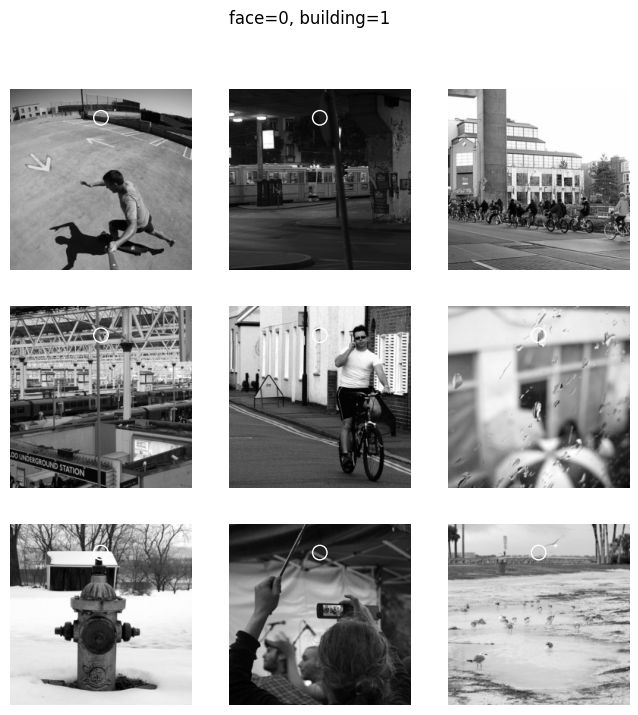

In [17]:
# plot examples - "has building" patches

ims2use = np.where((has_face[:,prf_ind]==0) & (has_building[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.suptitle('face=%d, building=%d'%(has_face[im, prf_ind], has_building[im,prf_ind]))

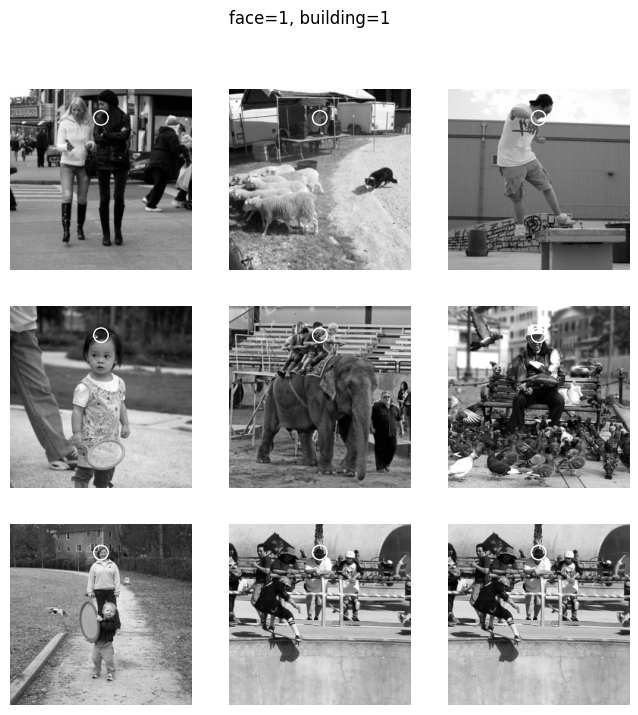

In [18]:
# plot examples - "has both" patches

ims2use = np.where((has_face[:,prf_ind]==1) & (has_building[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.suptitle('face=%d, building=%d'%(has_face[im, prf_ind], has_building[im,prf_ind]))

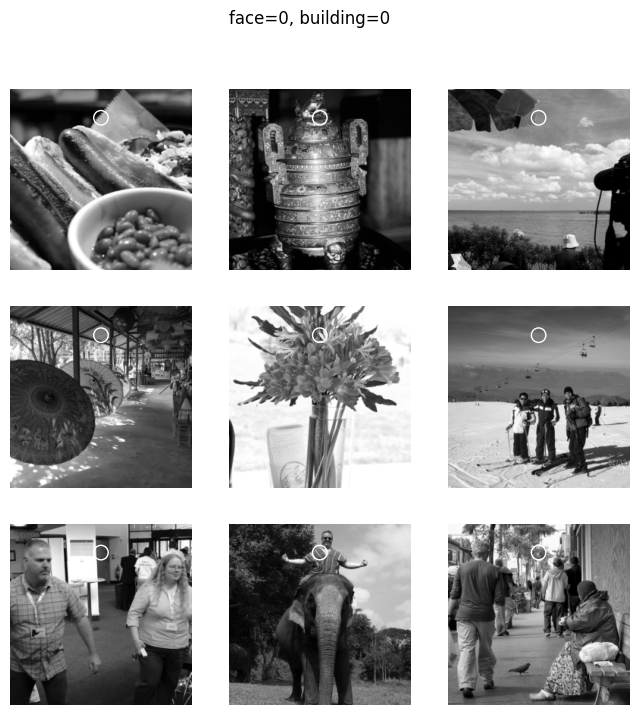

In [19]:
# plot examples - "has neither" patches

ims2use = np.where((has_face[:,prf_ind]==0) & (has_building[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.suptitle('face=%d, building=%d'%(has_face[im, prf_ind], has_building[im,prf_ind]))

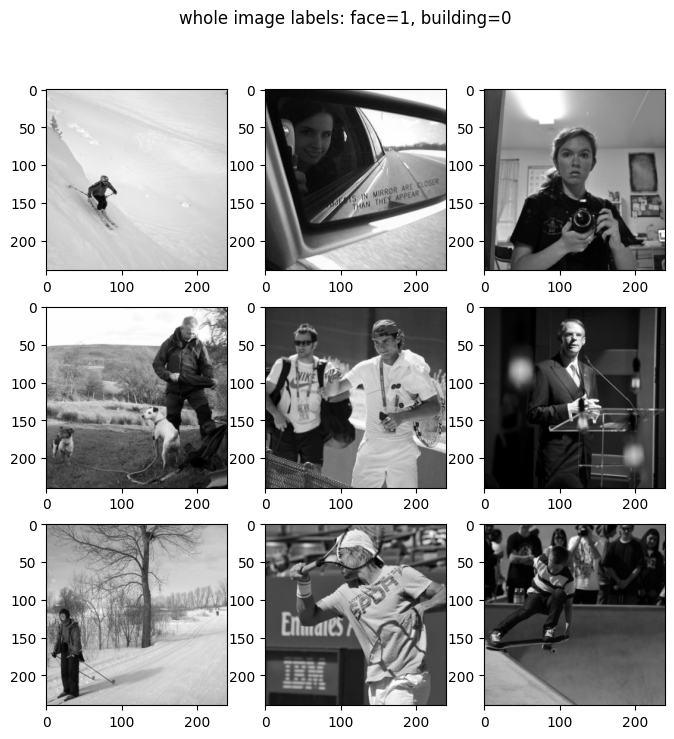

In [20]:
# plot examples - "has face" whole images

ims2use = np.where((has_face_wholeimage==1) & (has_building_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.suptitle('whole image labels: face=%d, building=%d'%(has_face_wholeimage[im], \
                                                             has_building_wholeimage[im]))

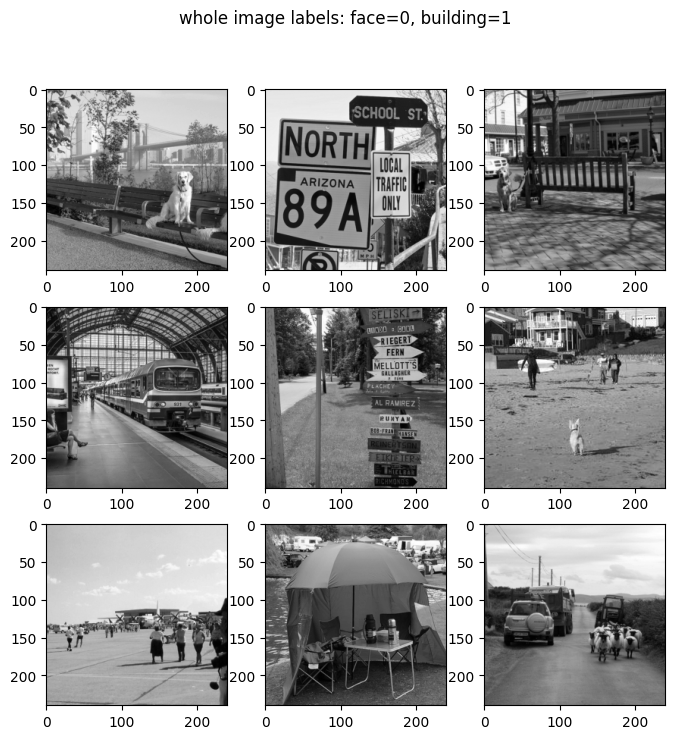

In [21]:
# plot examples - "has building" whole images

ims2use = np.where((has_face_wholeimage==0) & (has_building_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.suptitle('whole image labels: face=%d, building=%d'%(has_face_wholeimage[im], \
                                                             has_building_wholeimage[im]))

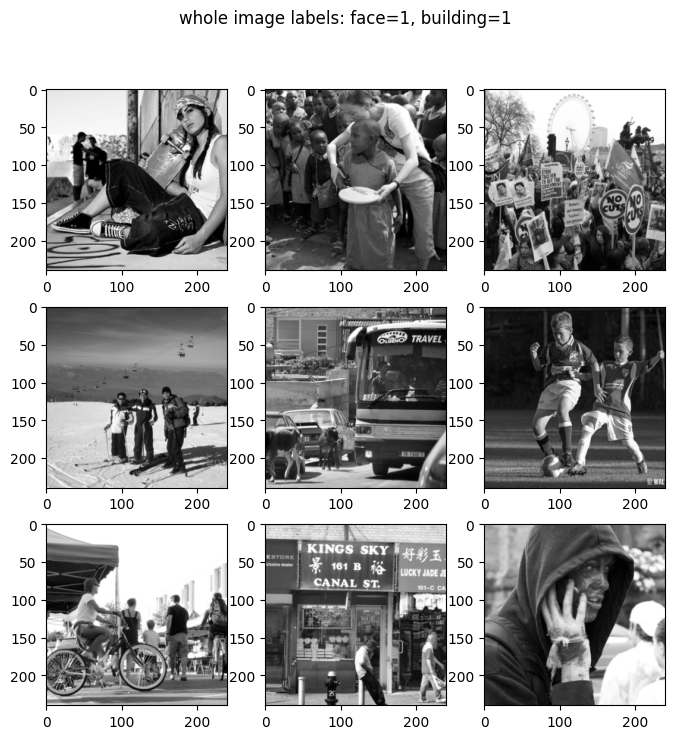

In [22]:
# plot examples - "has both" whole images

ims2use = np.where((has_face_wholeimage==1) & (has_building_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.suptitle('whole image labels: face=%d, building=%d'%(has_face_wholeimage[im], \
                                                             has_building_wholeimage[im]))

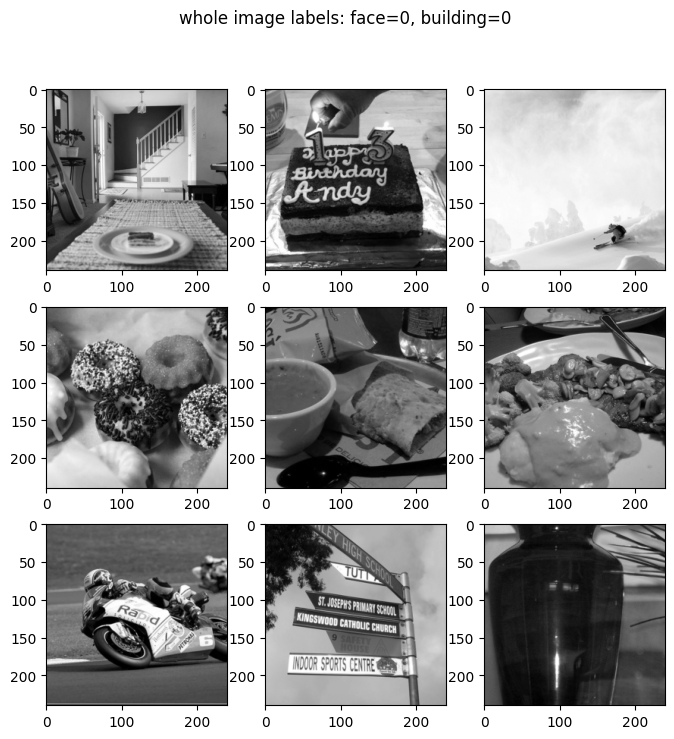

In [23]:
# plot examples - "has neither" whole images

ims2use = np.where((has_face_wholeimage==0) & (has_building_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.suptitle('whole image labels: face=%d, building=%d'%(has_face_wholeimage[im], \
                                                             has_building_wholeimage[im]))